In [128]:
%matplotlib inline

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.constants as c
import astropy.units as u
import sys
sys.path.pop(1)
sys.path.insert(0,'../')

In [130]:
import pyathena as pa

In [131]:
ids=['R2_2pc','R2_2pc_h10','R4_4pc','MHD_8pc_new','MHD_8pc_S_Om56','MHD_16pc_new_L']
basedir={'R2_2pc':'/tigress/changgoo/',
         'R2_2pc_h10':'/tigress/PERSEUS/changgoo/',
         'R2_2pc_v20':'/tigress/changgoo/',
         'R4_4pc':'/tigress/PERSEUS/changgoo/',
         'R4_4pc_v20':'/tigress/changgoo/',
         'R16_16pc':'/tigress/changgoo/',
         'MHD_8pc_new':'/tigress/changgoo/',
         'MHD_8pc_new_noSN':'/tigress/changgoo/',
         'HD_8pc_new':'/tigress/changgoo/'}

In [132]:
import os,glob

In [133]:
hst={}
param={}
for id in ids:
    if basedir.has_key(id): base=basedir[id]
    else: base='/tigress/PERSEUS/changgoo/'
    hstfilename='%s%s/id0/%s.hst' % (base,id,id)
    rstfilename=glob.glob('%s%s/id0/%s.????.rst' % (base,id,id))+glob.glob('%s%s/rst/%s.????.rst' % (base,id,id))
    hst[id]=pa.hst_reader(hstfilename)
    param[id],blocks,fields=pa.parse_par(rstfilename[0])

Reading a history file:/tigress/changgoo/R2_2pc/id0/R2_2pc.hst.p
Reading a history file:/tigress/PERSEUS/changgoo/R2_2pc_h10/id0/R2_2pc_h10.hst.p
Reading a history file:/tigress/PERSEUS/changgoo/R4_4pc/id0/R4_4pc.hst.p
Reading a history file:/tigress/changgoo/MHD_8pc_new/id0/MHD_8pc_new.hst.p
Reading a history file:/tigress/PERSEUS/changgoo/MHD_8pc_S_Om56/id0/MHD_8pc_S_Om56.hst
Reading a history file:/tigress/PERSEUS/changgoo/MHD_16pc_new_L/id0/MHD_16pc_new_L.hst


In [134]:
domain={}
prob_param={}
for id in ids:
    domain[id]={}
    prob_param[id]={}
    for f in param[id]['domain1']:
        domain[id][f]=eval(param[id]['domain1'][f][0])
    for f in param[id]['problem']:
        prob_param[id][f]=eval(param[id]['problem'][f][0])
print domain

{'R2_2pc_h10': {'x3max': 896, 'bc_ox2': 4, 'x1max': 128, 'x2max': 128, 'Nx3': 896, 'NGrid_x2': 4, 'NGrid_x3': 14, 'x2min': -128, 'bc_ix3': 2, 'bc_ix2': 4, 'bc_ix1': 4, 'AutoWithNProc': 0, 'bc_ox3': 2, 'bc_ox1': 4, 'Nx1': 128, 'Nx2': 128, 'level': 0, 'x3min': -896, 'x1min': -128, 'NGrid_x1': 4}, 'R4_4pc': {'x3max': 1792, 'bc_ox2': 4, 'x1max': 256, 'x2max': 256, 'Nx3': 896, 'NGrid_x2': 4, 'NGrid_x3': 14, 'x2min': -256, 'bc_ix3': 2, 'bc_ix2': 4, 'bc_ix1': 4, 'AutoWithNProc': 0, 'bc_ox3': 2, 'bc_ox1': 4, 'Nx1': 128, 'Nx2': 128, 'level': 0, 'x3min': -1792, 'x1min': -256, 'NGrid_x1': 4}, 'MHD_8pc_new': {'x3max': 3584, 'bc_ox2': 4, 'x1max': 512, 'x2max': 512, 'Nx3': 896, 'NGrid_x2': 4, 'irefine': 0, 'NGrid_x3': 14, 'x2min': -512, 'bc_ix3': 2, 'bc_ix2': 4, 'bc_ix1': 4, 'AutoWithNProc': 224, 'bc_ox3': 2, 'bc_ox1': 4, 'Nx1': 128, 'Nx2': 128, 'level': 0, 'x3min': -3584, 'x1min': -512, 'NGrid_x1': 4}, 'R2_2pc': {'x3max': 896, 'bc_ox2': 4, 'x1max': 128, 'x2max': 128, 'Nx3': 896, 'NGrid_x2': 4, 'ire

In [135]:
print prob_param[ids[0]]['surf']

207.415


In [136]:
units=pa.set_units(muH=1.4271)
Myr=units['time'].to('Myr')
Msun=units['mass'].to('Msun')
pok=(units['pressure']/c.k_B).cgs
surf=(units['density']*units['length']).to('Msun/pc^2')

0.0926309
0.0926309
0.0548003
0.028
0.056
0.028


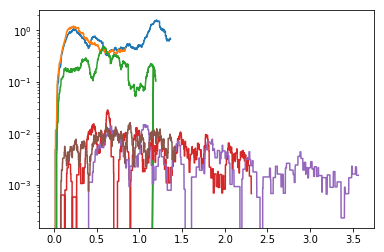

In [137]:
for id in ids:
    h=hst[id]
    omega=eval(param[id]['problem']['Omega'][0])
    print omega
    torb=2*np.pi/omega
    h['torb']=h['time']/torb
    plt.plot(h['time']/torb,h['sfr10'])
plt.yscale('log')

0.0926309
0.0926309
0.0548003
0.028
0.056
0.028


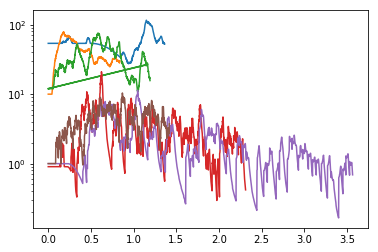

In [138]:
for id in ids:
    h=hst[id]
    omega=eval(param[id]['problem']['Omega'][0])
    print omega
    torb=2*np.pi/omega
    h['torb']=h['time']/torb
    plt.plot(h['time']/torb,h['heat_ratio'])
plt.yscale('log')

2 128 128 1792 0.0352571473967
203.601544193 207.415
2 128 128 1792 0.0352571473967
203.601544193 207.415
4 128 128 3584 0.0352571473967
86.2470597475 87.9406
8 128 128 7168 0.0352571473967
13.0039800741 13.0
8 128 128 3584 0.0352571473967
13.0031157606 13.0
16 128 128 7168 0.0352571473967
13.0039800741 13.0


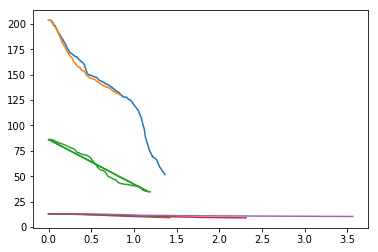

In [139]:
for id in ids:
    h=hst[id]
    Lz=domain[id]['x3max']-domain[id]['x3min']
    Nz=domain[id]['Nx3']
    Nx=domain[id]['Nx1']
    Ny=domain[id]['Nx2']
    dz=Lz/Nz
    print dz,Nx,Ny,Lz,surf.value
    h['surf']=h['mass']*Lz*surf.value
    print h['surf'][0],prob_param[id]['surf']
    plt.plot(h['torb'],h['surf'])
#    l,=plt.plot(h['torb'],h['mass']/h['mass'][0])
#    plt.plot(h['torb'],h['msp']/h['mass'][0],color=l.get_color(),ls='--')
#    plt.plot(h['torb'],1-(h['mass']+h['msp'])/h['mass'][0],color=l.get_color(),ls=':')


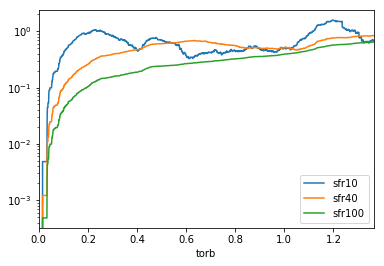

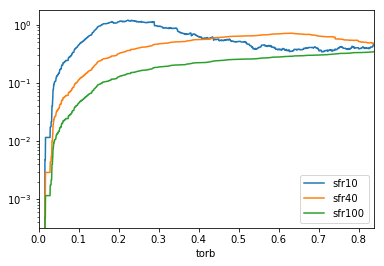

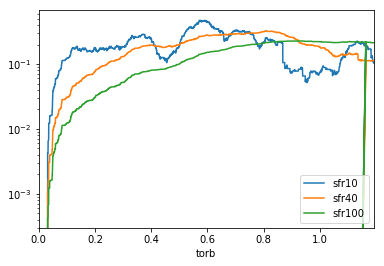

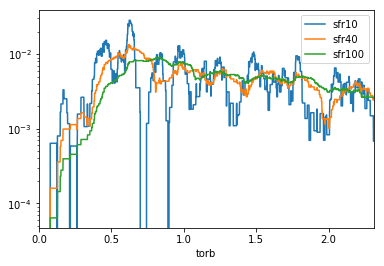

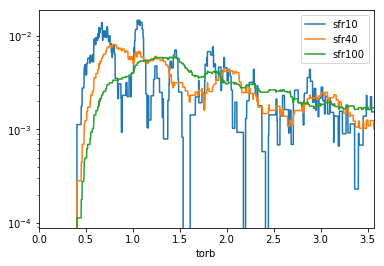

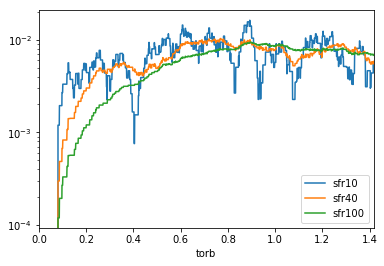

In [140]:
for id in ids:
    hst[id].plot(x='torb',y=['sfr10','sfr40','sfr100'],logy=True)

# Mass Fractions from the history dump



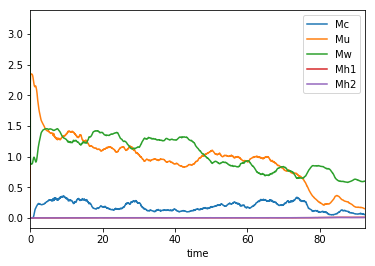

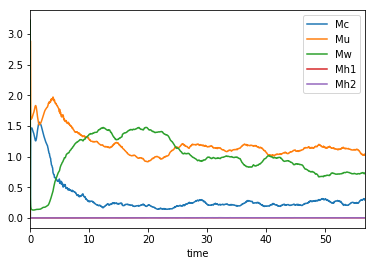

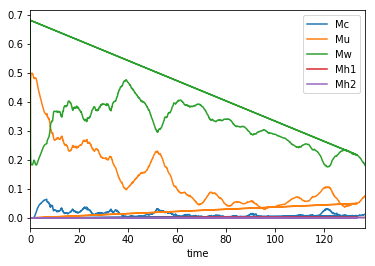

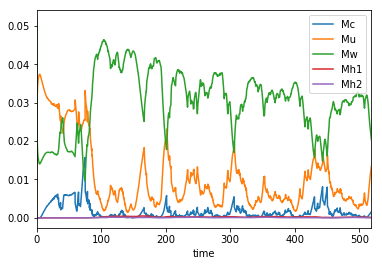

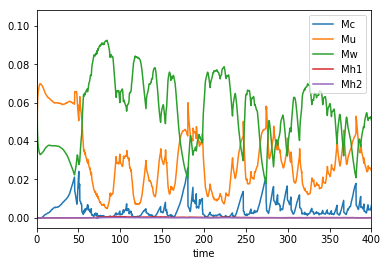

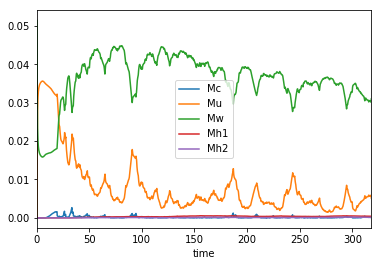

In [141]:
for id in ids:
    hst[id].plot(x='time',y=['Mc','Mu','Mw','Mh1','Mh2'])

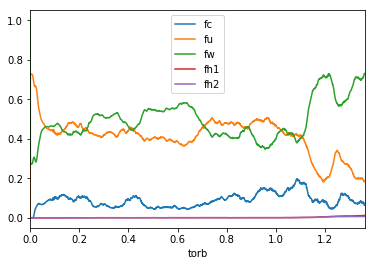

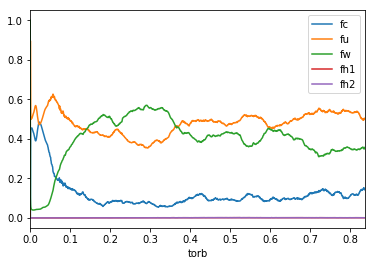

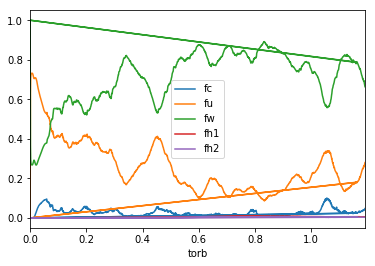

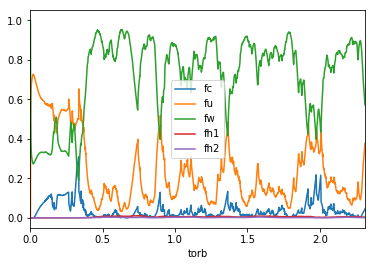

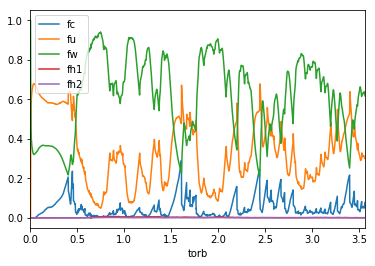

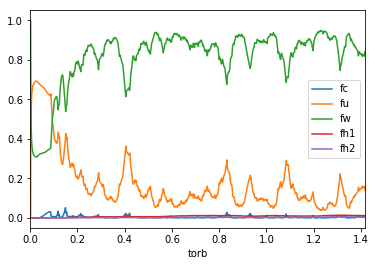

In [142]:
# to convert the mean density of each phase to fraction
phase=['c','u','w','h1','h2']
for id in ids:
    fig=plt.figure()
    for p in phase:
        hst[id]['f'+p]=hst[id]['M'+p]/hst[id]['mass']
        hst[id].plot(x='torb',y='f'+p,ax=plt.gca())

# Scale heights

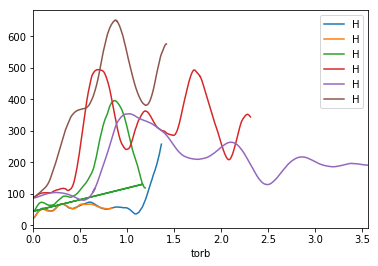

In [143]:
for id in ids:
    hst[id]['H']=np.sqrt(hst[id]['H2']/hst[id]['mass'])
    hst[id].plot(x='torb',y='H',ax=plt.gca())

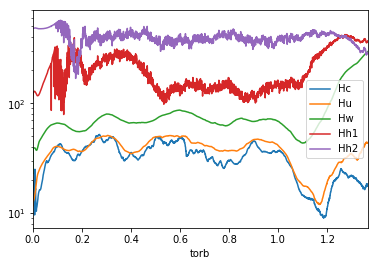

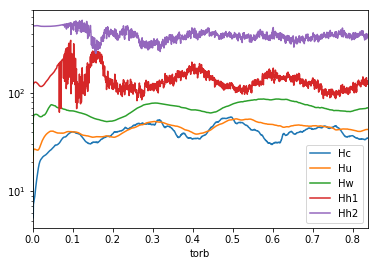

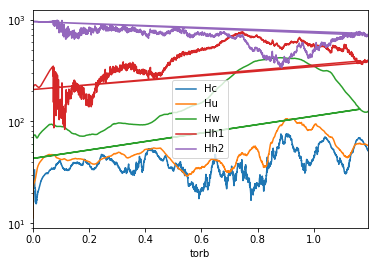

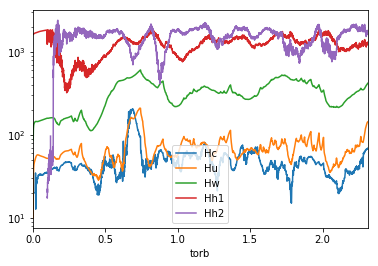

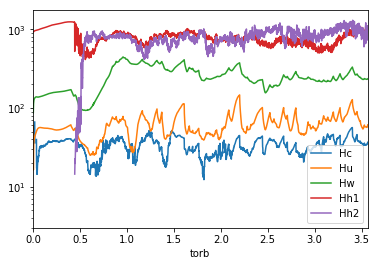

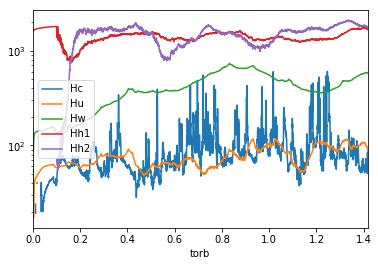

In [144]:
phase=['c','u','w','h1','h2']
for id in ids:
    fig=plt.figure()
    for p in phase:
        hst[id]['H'+p]=np.sqrt(hst[id]['H2'+p]/hst[id]['M'+p])
        hst[id].plot(x='torb',y='H'+p,ax=plt.gca())
    plt.yscale('log')

# Velocity dispersion

/tigress/changgoo/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


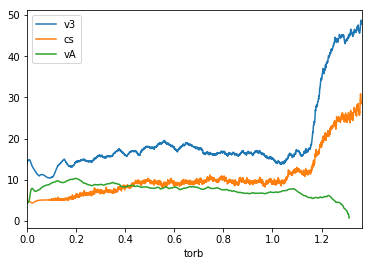

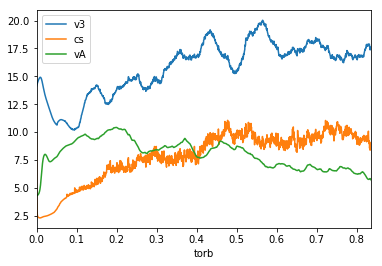

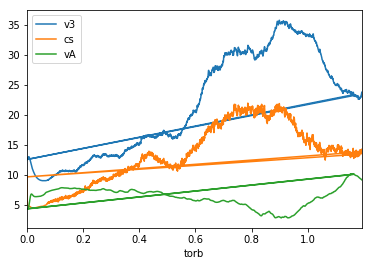

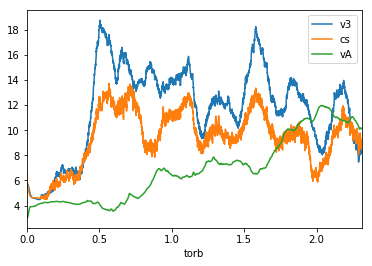

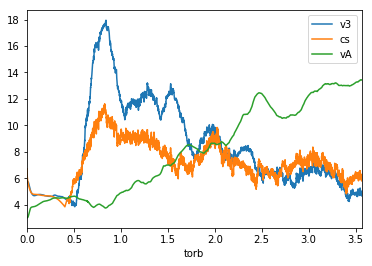

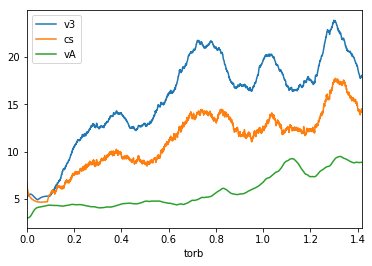

In [145]:
for id in ids:
    hst[id]['v3']=np.sqrt(2.0*hst[id]['x3KE']/hst[id]['mass'])
    hst[id]['cs']=np.sqrt(hst[id]['P']/hst[id]['mass'])
    hst[id]['vA']=np.sqrt(2.0*(hst[id]['x1ME']+hst[id]['x2ME']-hst[id]['x3ME'])/hst[id]['mass'])
    hst[id].plot(x='torb',y=['v3','cs','vA'])


In [146]:
import pyathena as pa

In [ ]:
for id in ids[-2:]:
    plt.plot(hst[id]['time'],hst[id]['mass'])